# Milesstone 1 Phase 0

### Perkenalan

- Nama  : Jonathan Tuahta
- Batch : BSD-02

- tablue: https://public.tableau.com/app/profile/jonathan.tuahta/viz/Milestone01/Dashboard1?publish=yes

- Program ini dibuat untuk menganalisis kejadian customer churn pada perusahaan telko dan membuat rekomendasi strategi berdasarkan data yang dimiliki.

---

### S.M.A.R.T 
-  Specify : Meningkatkan customer loyality dari perushaan dan meningkatkan pelanggan perusahaan
-  Measureable : mempertahankan sebagian besar yang telah lama berlangganan dengan memberikan pelayanan yang sesuai dengan kebutuhan para pelanggan dan memberikan keuntungan-keuntungan yang dapat menarik pelanggan baru
- Achievable : meningkatkan kepuasan pelanggan lama dengan cara memberikan pelayanan yang telah didaftarkan setiap pelanggan, memperhatikan informasi pelanggan sehingga perusahaan dapat mengetahui kebutuhan para pelanggan.
- Relevant : meningkatkan kepuasan pelanggan terhadap setiap layanan kita dapat menjadi faktor penting untuk meningkatkan pendapatan perusahaan disisi lain nama perusahaan akan dikenal baik oleh masyarakat sehingga dapat menarik calon calon pelanggan
- Time Bound : tujuan diestimasi dapat ditetapkan rampung dalam dua quartal proses pengerjaan dengan catatan tingkat retentsi pelanggan dapat meningkat sebanyak 50% dan mengurangi churn rate sebesar 30% 

*Probelem Statement*:
`meningkatkan pendapatan perusahaan dengan cara meningkatakn customer loyality/customer retention dengan cara memaksimalkan pelayanan pada pelanggan, memperbaiki layanan yang dianggap kurang memuaskan. hal tersebut dilakukan untuk mempertahankan sebagian besar pelanggan sekaligus menarik pelanggan baru. perusahaan akan menargetkan peningkatan retensi pelanggan 50% dan menguragi churn rate sebesar 30%`

---

### penjabaran masalah dengan menggunakan 5W+1H
- Apakah lama waktu berlangganan berpengaruh terhdap churn rate perusahaan?
- Bagaimana persebaran data dari total harga, harga per bulan, tenure
- siapa saja yang cocok dengan layanan yang kami berikan?
- apa yang menjadi faktor ketertarikan pelanggan terhadap layanan perusahaan?
- berapa preferensi harga yang cocok untuk layanan berdasarkan pengeluaran pelanggan?
- berapa rata-rata pengeluaran bulanan & total pengeluaran untuk para pelanggan yang cocok dengan layanan?

### Data Loading

In [46]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [47]:
telko = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

**Deskripsi**
> dataset ini berisi mengenai informasi pelanggan perusahaan telko dengan data berisi preferensi pelanggan, pelayanan pelanggan, demografis dll

**Context**
> kita bisa menganalisis tingakt loyalitas pelanggan dari preferesni berlangganan pelanggan dan beberapa fakor lainnya seperti demografis,  pengeluaran, dan masih banyak lagi

In [48]:
pd.set_option('display.max_columns', None)
telko.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
telko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### penjelasan mengenai data:
| Kolom  | Penjelasan |
| ----- | --- |
| customerID  | berisi unique value masing masing customer  |
| gender | apakah customer berjenis kelamin pria atau wanita  |
| SeniorCitizen  | apakah pelanggan termasuk masyarakat senior(tua) (1 , 0)  |
| Partner | apakah peanggan mempunyai pasangan (Yes , No)  |
| Dependents  | apakah pelanggan punya tanggungan atau tidak (Yes, No)  |
| tenure | Jumlah bulan pelanggan telah bergabung dengan perusahaan  |
| PhoneService  | Apakah pelanggan memiliki layanan telepon atau tidak (Ya, Tidak)  |
| MultipleLines | Apakah pelanggan memiliki banyak saluran atau tidak (Ya, Tidak, Tidak ada layanan telepon)  |
| InternetService | Penyedia layanan internet pelanggan (DSL, Fiber optic, Tidak)  |
| OnlineSecurity| Apakah pelanggan memiliki keamanan online atau tidak (Ya, Tidak, Tidak ada layanan internet)  |
| OnlineBackup  | Apakah pelanggan memiliki cadangan online atau tidak (Ya, Tidak, Tidak ada layanan internet)  |
| DeviceProtection | Apakah pelanggan memiliki perlindungan perangkat atau tidak (Ya, Tidak, Tidak ada layanan internet)  |
| TechSupport  | Apakah pelanggan memiliki dukungan teknis atau tidak (Ya, Tidak, Tidak ada layanan internet)  |
| StreamingTV | Apakah pelanggan memiliki TV streaming atau tidak (Ya, Tidak, Tidak ada layanan internet)  |
| StreamingMovies  | bApakah pelanggan memiliki film streaming atau tidak (Ya, Tidak, Tidak ada layanan internet)  |
| Contract  | Jangka waktu kontrak pelanggan (Bulan ke bulan, Satu tahun, Dua tahun)  |
| PaperlessBilling  | Apakah pelanggan memiliki tagihan tanpa kertas atau tidak (Ya, Tidak)  |
| PaymentMethod | Metode pembayaran pelanggan (Cek elektronik, Cek melalui pos, Transfer bank (otomatis), Kartu kredit (otomatis))  |
| MonthlyCharges  | Jumlah yang dibebankan kepada pelanggan setiap bulannya  |
| TotalCharges | Jumlah total yang dibebankan kepada pelanggan  |
| Churn  | apakah pelanggan berlangganan kembali (Yes, No)  |


### Data Cleaning
data-data yang ditampilkan merupakan data-data dari perusahaan dan perlu dibersihkan misalnya ada kolom yang tidak perlu digunakan, kita perlu menggunakan ```dropna``` untuk menghapus data yang tidak dibutuhkan, kita juga perlu membersihkan duplicate values pada masing masing table gunakan ```drop_duplicates```, selanjutnya kita juga akan membersihkan values yang tidak diperlukan atau jika ada values yang tidak sesuai dengan tipe kolom data gunakan ```replace``` dan setelah kita mengecek values, kita akan mengecek tipe data pada kolom dan jika perlu ada pengubahan tipe data kita akan gunakan ```astype```.

In [50]:
# Drop duplicate values & missing values
telko.drop_duplicates(inplace=True)
telko.dropna()

telko.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> sepertinya tidak ada missing values pada tabel ini menunjukkan bahwa table memang sudah bersih. Namun kita perlu mengubah tipe data dari total charge

> data customerID tidak diperlukan untuk dianalisis jadi kita akan menghilangkan kolom tersebut


In [51]:
# change data type for totalCharges to float
telko['TotalCharges'] = pd.to_numeric(telko['TotalCharges'], errors='coerce')

telko['TotalCharges'] = pd.to_numeric(telko['TotalCharges'], errors='coerce').fillna(-1)

telko.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
# drop customer id
telko_data = telko.drop(columns="customerID")
telko_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


> kolom customerID telah dihapus 

---

## Exploration Data / Analisis data

### 1. apa yang menjadi faktor ketertarikan pelanggan terhadap layanan perusahaan?
kita akan menggunakan chi square untuk menentukan faktor apa saya yang mempengaruhi ketertarikan pelanggan (churn)

H0 : kolom target dan kolom churn tidak berkaitan
H1 : kolom target dan kolom chunr berkaitan

**gunakan confidence percentage : 95%**

In [53]:
# chi square test
cols = telko_data.drop(columns=['MonthlyCharges', 'Churn' ,'TotalCharges', 'tenure']).columns #drop numerical values and also churn

for col in cols:
  cross = pd.crosstab(telko[col],telko['Churn']) 
  pval = stats.chi2_contingency(cross).pvalue #chi square formula
  prompt = "and they are dependent" if pval<0.05 else "" #using alpha = 0.05
  print(f"P-value of {col} and Churn: {pval} {prompt}")

P-value of gender and Churn: 0.48657873605618596 
P-value of SeniorCitizen and Churn: 1.510066805092378e-36 and they are dependent
P-value of Partner and Churn: 2.1399113440759935e-36 and they are dependent
P-value of Dependents and Churn: 4.9249216612154196e-43 and they are dependent
P-value of PhoneService and Churn: 0.3387825358066928 
P-value of MultipleLines and Churn: 0.0034643829548773 and they are dependent
P-value of InternetService and Churn: 9.571788222840544e-160 and they are dependent
P-value of OnlineSecurity and Churn: 2.6611496351765517e-185 and they are dependent
P-value of OnlineBackup and Churn: 2.0797592160864276e-131 and they are dependent
P-value of DeviceProtection and Churn: 5.505219496457244e-122 and they are dependent
P-value of TechSupport and Churn: 1.4430840279998987e-180 and they are dependent
P-value of StreamingTV and Churn: 5.528994485739183e-82 and they are dependent
P-value of StreamingMovies and Churn: 2.667756755723681e-82 and they are dependent
P-v

> dapat diketahui bahwa kolom kolom yang terkait dengan churn adalah ```SeniorCitizen, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod ```

kita harus menguji secara detail bagaimana setiap kolom ini dapat berpengaruh terhadap churn. maka dari itu kita akan menggunakan ```mean()``` untuk mengkalkulasikan detail pengaruh dari setiap kolom.

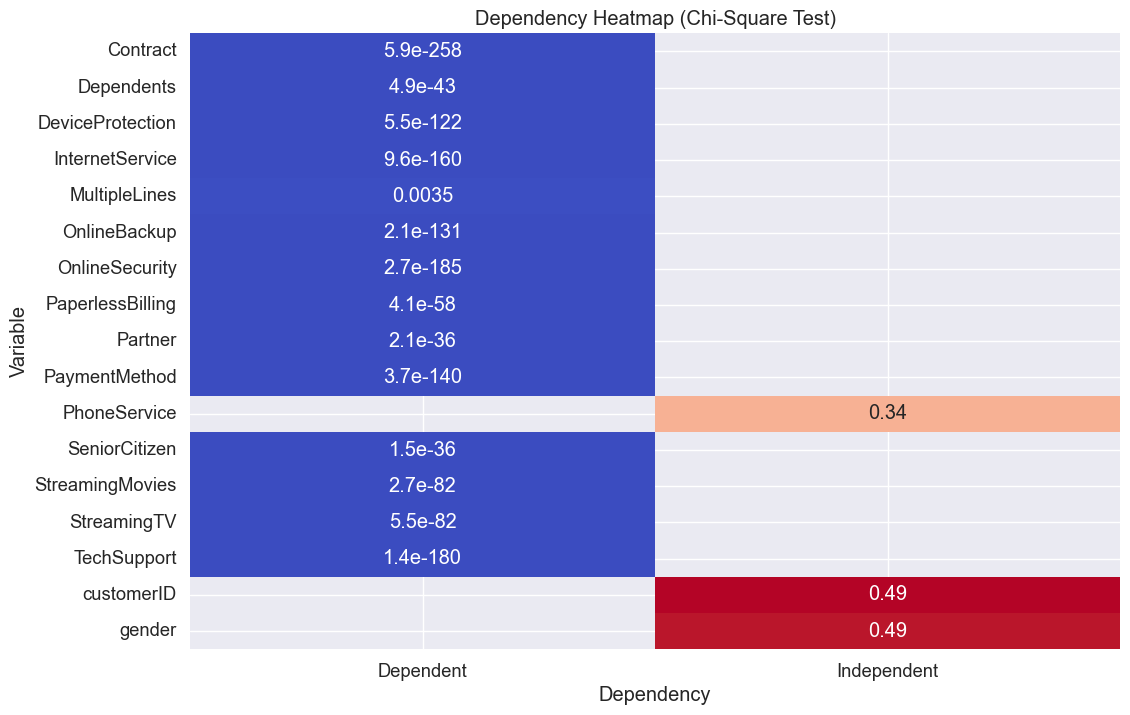

In [54]:
# Columns to exclude
cols = telko.drop(columns=['MonthlyCharges', 'Churn', 'TotalCharges', 'tenure']).columns

p_values = []
dependencies = []

for col in cols:
    cross = pd.crosstab(telko[col], telko['Churn'])
    pval = stats.chi2_contingency(cross).pvalue
    is_dependent = pval < 0.05
    p_values.append(pval)
    dependencies.append("Dependent" if is_dependent else "Independent")

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Variable': cols, 'P-Value': p_values, 'Dependency': dependencies})

# Reshape the DataFrame for heatmap
heatmap_data = result_df.pivot(index='Variable', columns='Dependency', values='P-Value')

# Create the heatmap
sns.set(font_scale=1.2)  # Adjust the font size if needed
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=False)
plt.title("Dependency Heatmap (Chi-Square Test)")
plt.show()

In [55]:
telko_data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

diketahui bahwa value churn hanya (Yes & No) dan untuk memudahkan mengkalkulasikan pengaruh dari setiap kolom maka value akan diubah menjadi Yes=1 dan No=0 dimana value yes berarti total jumlah customer yang memilih tidak menggunakan layanan perusahaan sedangkan No adalah sebaliknya.

In [56]:
#converting values of churn
churn_dt = telko_data.copy()
churn_dt['Churn'] = churn_dt['Churn'].replace({'Yes':1,'No':0})
churn_dt['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

Churn
<class 'str'>    7043
Name: count, dtype: int64


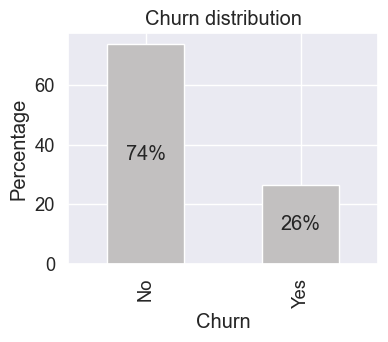

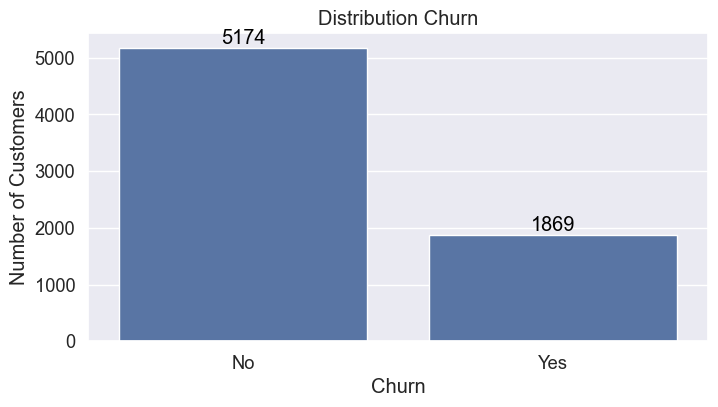

In [57]:
print(telko_data['Churn'].apply(type).value_counts())
ax0=telko_data['Churn'].value_counts(normalize=True).mul(100).round(1).plot(kind='bar',color=["#c2c0c0", "#c2c0c0"], title="Churn distribution", ylabel="Percentage", figsize=(4,3))
ax0.bar_label(ax0.containers[0],label_type="center",fmt='%.f%%')
plt.show()

plt.figure(figsize = (8,4))
ax = sns.countplot(x = telko_data["Churn"])
ax.bar_label(ax.containers[0], color = "black")
plt.title("Distribution Churn")
plt.ylabel("Number of Customers")
plt.show()

In [58]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('SeniorCitizen')[['Churn']].mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


dapat diketahui bahwa semakin lama orang tersebut tinggal (Senior) maka semakin tinggi churn ratenya

In [59]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('Partner')[['Churn']].mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [60]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('Dependents')[['Churn']].mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [61]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('MultipleLines')[['Churn']].mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


ternyata pengaruh MultipleLines(banyak saluran) tidak signifikan terhadap churn rate perusahaan

In [62]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('InternetService')[['Churn']].mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [63]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('OnlineSecurity')[['Churn']].mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [64]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('OnlineBackup')[['Churn']].mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [65]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('DeviceProtection')[['Churn']].mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [66]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('TechSupport')[['Churn']].mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [67]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('StreamingTV')[['Churn']].mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


layanan streamingTV juga tidak berpengaruh terhadap churn rate perusahaan

In [68]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('StreamingMovies')[['Churn']].mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


layanan streamingMovies juga tidak berpengaruh signifikan terhadap churn rate perusahaan

In [69]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('Contract')[['Churn']].mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [70]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('PaperlessBilling')[['Churn']].mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [71]:
# measuring the significant influence based on the value of the outgoing value
churn_dt.groupby('PaymentMethod')[['Churn']].mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


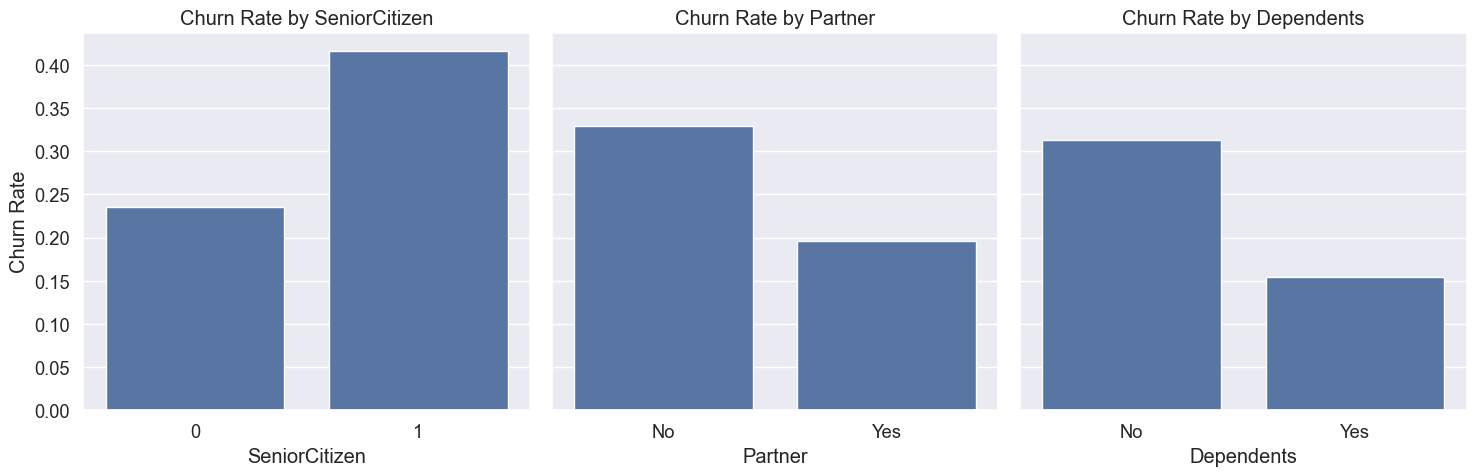

In [72]:
# churn rate by customer preference
features = ['SeniorCitizen', 'Partner', 'Dependents']

# Create subplots for each feature
fig, axes = plt.subplots(1, len(features), figsize=(15, 5), sharey=True)

# Loop through each feature and create a bar plot for the churn rate
for i, feature in enumerate(features):
    # Calculate the average churn rate for the current feature
    avg_churn = churn_dt.groupby(feature)[['Churn']].mean().reset_index()
    
    # Create a bar plot
    sns.barplot(y='Churn', x=feature, data=avg_churn, ax=axes[i])
    
    axes[i].set_title(f"Churn Rate by {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Churn Rate")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

ternyata pelanggan yang mengalami churn kebanyakan berada pada kelas senior citizen, tidak mempunyai pasangan dan tidak memiliki tanggungan

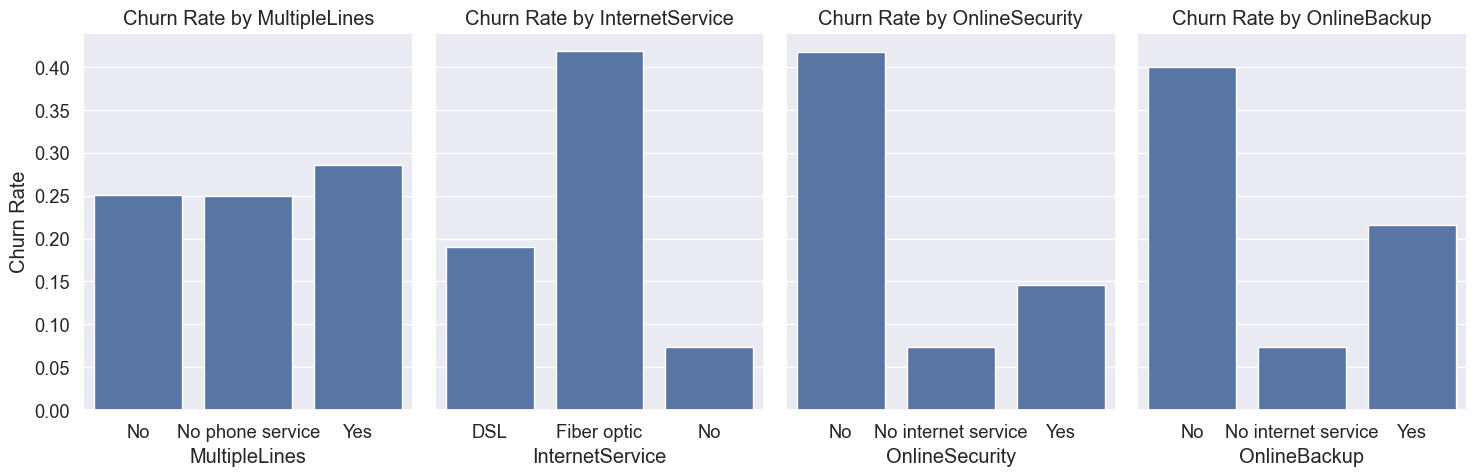

In [73]:
# churn rate by customer subscribe
features = ['MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup']

# Create subplots for each feature
fig, axes = plt.subplots(1, len(features), figsize=(15, 5), sharey=True)

# Loop through each feature and create a bar plot for the churn rate
for i, feature in enumerate(features):
    # Calculate the average churn rate for the current feature
    avg_churn = churn_dt.groupby(feature)[['Churn']].mean().reset_index()
    
    # Create a bar plot
    sns.barplot(y='Churn', x=feature, data=avg_churn, ax=axes[i])
    
    axes[i].set_title(f"Churn Rate by {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Churn Rate")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

layanan seperti internet dengan fiber optic merupakan faktor signifikan terjadinya churn rate, tidak adanya pelayanan seperti online security online backup merupakan faktor yang signifikan mempengaruhi churn rate, dan multi channel cukup berpengaruh terhadap churn rate.

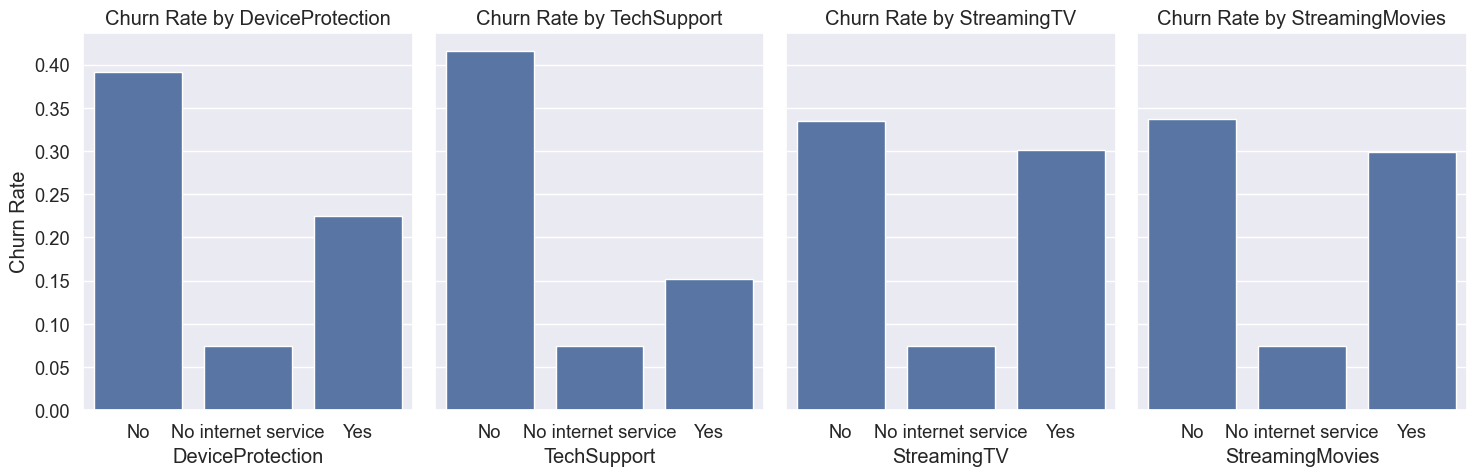

In [74]:
# churn rate by customer subscribe
features = ['DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots for each feature
fig, axes = plt.subplots(1, len(features), figsize=(15, 5), sharey=True)

# Loop through each feature and create a bar plot for the churn rate
for i, feature in enumerate(features):
    # Calculate the average churn rate for the current feature
    avg_churn = churn_dt.groupby(feature)[['Churn']].mean().reset_index()
    
    # Create a bar plot
    sns.barplot(y='Churn', x=feature, data=avg_churn, ax=axes[i])
    
    axes[i].set_title(f"Churn Rate by {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Churn Rate")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

tidak adanya layanan device protection, techsupport juga berpengaruh terhadap churn rate dan layanan streamingTV dan Streaming Movies berpengaruh terhadap churn rate 

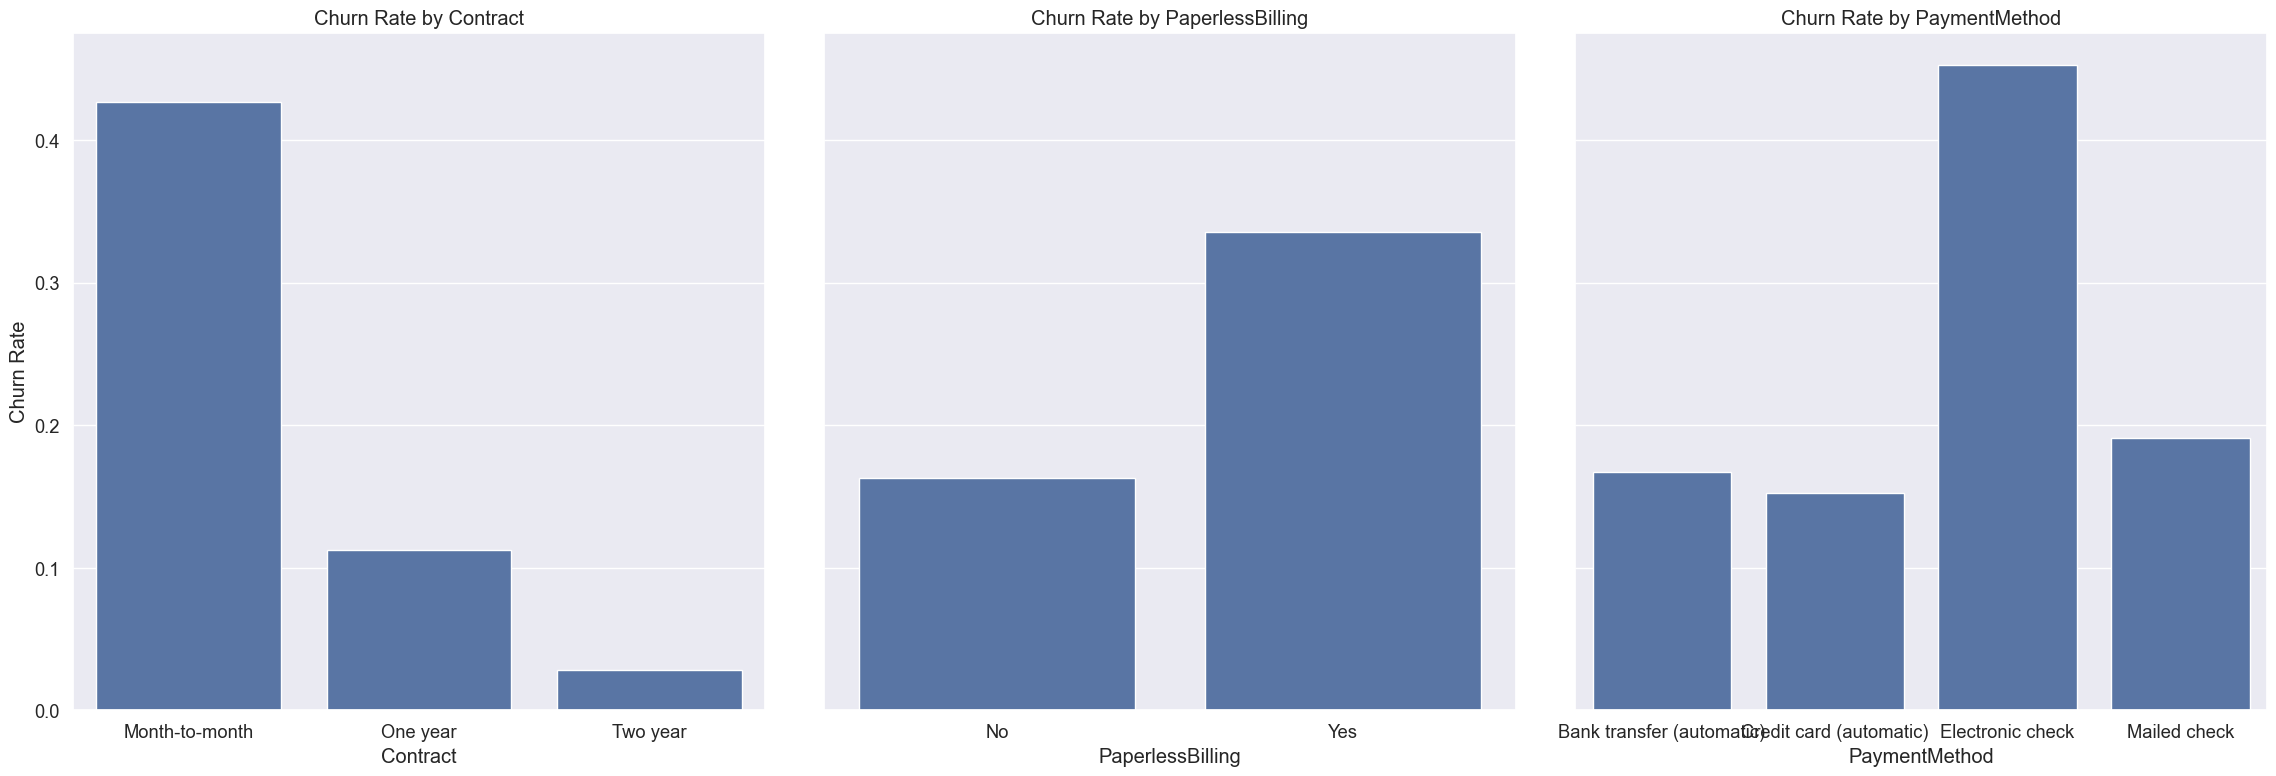

In [75]:
# churn rate by customer subscribe
features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Create subplots for each feature
fig, axes = plt.subplots(1, len(features), figsize=(23, 8), sharey=True)

# Loop through each feature and create a bar plot for the churn rate
for i, feature in enumerate(features):
    # Calculate the average churn rate for the current feature
    avg_churn = churn_dt.groupby(feature)[['Churn']].mean().reset_index()
    
    # Create a bar plot
    sns.barplot(y='Churn', x=feature, data=avg_churn, ax=axes[i])
    
    axes[i].set_title(f"Churn Rate by {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Churn Rate")

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

ternyata kontrak yang semakin pendek juga mempengaruhi churn rate, metode pembayaran menggunakan electronic check juga mempengaruhi churn rate dan paperless billing berpengaruh terhadap churn rate


##### dapat disimpulkan dari penjabaran data diatas diketahui bahwa PaymentMethod, Contract, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, InternetService, Dependents, Partner, dan SeniorCitizen cukup berpengaruh terhadap churn rate perusahaan.

---
### 2. Siapa saja yang cocok dengan layanan yang kami berikan?

pertama kita akan membagi pelanggan yang sudah tidak berlangganan dan pelanggan yang masih berlangganan. setelah itu, kita akan menganalisis demografi dan preferensi lainnya.

In [76]:
customer_data = telko_data[telko_data['Churn'] =='No']
len(customer_data)


5174

In [77]:
customer_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.128721,37.569965,61.265124,2549.909316
std,0.334923,24.113777,31.092648,2329.956543
min,0.000000,0.000000,18.250000,-1.000000
25%,0.000000,15.000000,25.100000,572.900000
50%,0.000000,38.000000,64.425000,1679.525000
75%,0.000000,61.000000,88.400000,4262.850000
max,1.000000,72.000000,118.750000,8672.450000


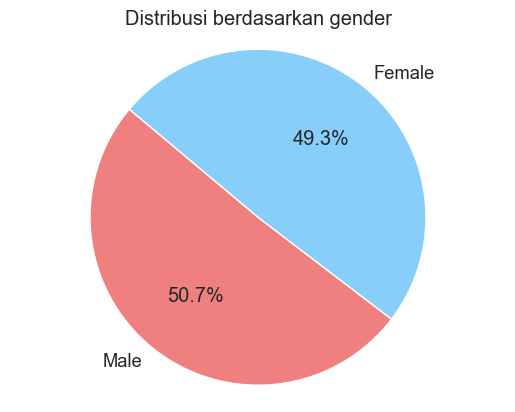

In [78]:

Gender_counts = customer_data['gender'].value_counts()

# Siapkan label dan data
labels = Gender_counts.index
sizes = Gender_counts.values

# Warna yang akan digunakan
colors = ['lightcoral', 'lightskyblue']

# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.title('Distribusi berdasarkan gender')

# Tampilkan pie chart
plt.show()

pelanggan yang masih berlangganan lebih banyak laki-laki. namun, jumlah pelanggan wanita hampir sama dengan laki-laki yang menandakan bahwa tidak ada preferensi gender terhadap kecocokan dengan layanan.

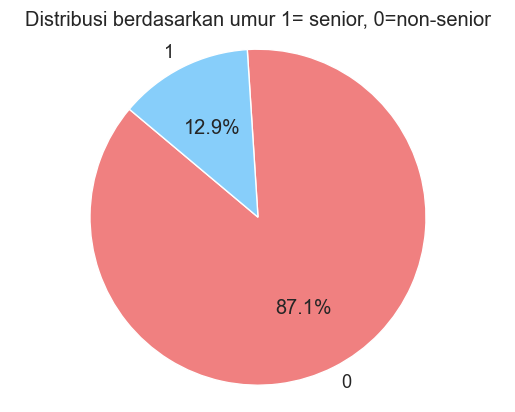

In [79]:
customer_data['SeniorCitizen'].value_counts()

Senior_counts = customer_data['SeniorCitizen'].value_counts()

# Siapkan label dan data
labels = Senior_counts.index
sizes = Senior_counts.values

# Warna yang akan digunakan
colors = ['lightcoral', 'lightskyblue']

# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.title('Distribusi berdasarkan umur 1= senior, 0=non-senior')

# Tampilkan pie chart
plt.show()

pelanggan yang paling banyak merupakan pelanggan muda dengan umur dibawah 65 tahun.

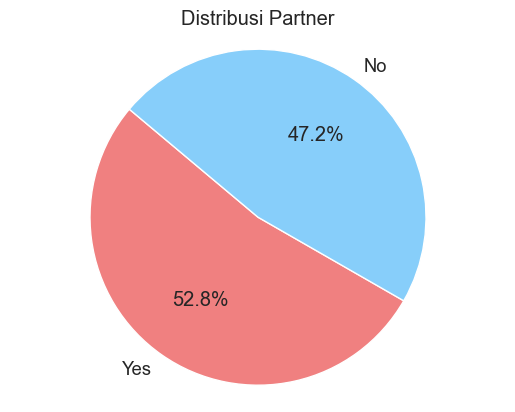

In [80]:
partner_counts = customer_data['Partner'].value_counts()

# Siapkan label dan data
labels = partner_counts.index
sizes = partner_counts.values

# Warna yang akan digunakan
colors = ['lightcoral', 'lightskyblue']

# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.title('Distribusi Partner')

# Tampilkan pie chart
plt.show()

kebanyakan mereka juga telah memiliki partner. 

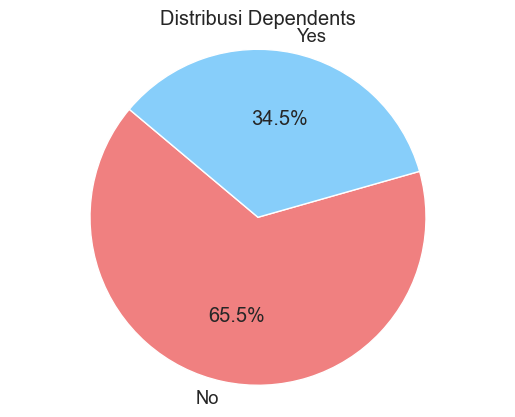

In [81]:
dependents_counts = customer_data['Dependents'].value_counts()

# Siapkan label dan data
labels = dependents_counts.index
sizes = dependents_counts.values

# Warna yang akan digunakan
colors = ['lightcoral', 'lightskyblue']

# Buat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.title('Distribusi Dependents')

# Tampilkan pie chart
plt.show()


> dari analisis ini kita bisa mengetahui bahwa pelanggan kita kebanyakan berasal dari kalangan muda yang masih belum memiliki tanggungan dan telah memiiki pasangan. 
---

## 3. berapa rata-rata pengeluaran bulanan & total pengeluaran untuk para pelanggan yang masih berlangganan?

In [82]:
loyality = customer_data[(customer_data['Dependents'] == 'No') & (customer_data['Partner'] == 'Yes') & (customer_data['SeniorCitizen'] == 0)]
print(' customer yang cocok dengan layanan:' , len(loyality))

 customer yang cocok dengan layanan: 921


In [83]:
condition = (customer_data["Churn"] == "No") 
pengeluaran = customer_data[condition].groupby(["SeniorCitizen"]).agg(Rata_rata_bulanan = ("MonthlyCharges", "mean"),
                                                    rata_rata_total = ("TotalCharges","mean")).reset_index()
pengeluaran

,SeniorCitizen,Rata_rata_bulanan,rata_rata_total
0,0,58.618123,2410.400333
1,1,79.182057,3494.213363


C:\Users\Jonathan T\AppData\Local\Temp\ipykernel_10156\3876029692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="SeniorCitizen", y="Rata_rata_bulanan", data=pengeluaran, palette="Blues")


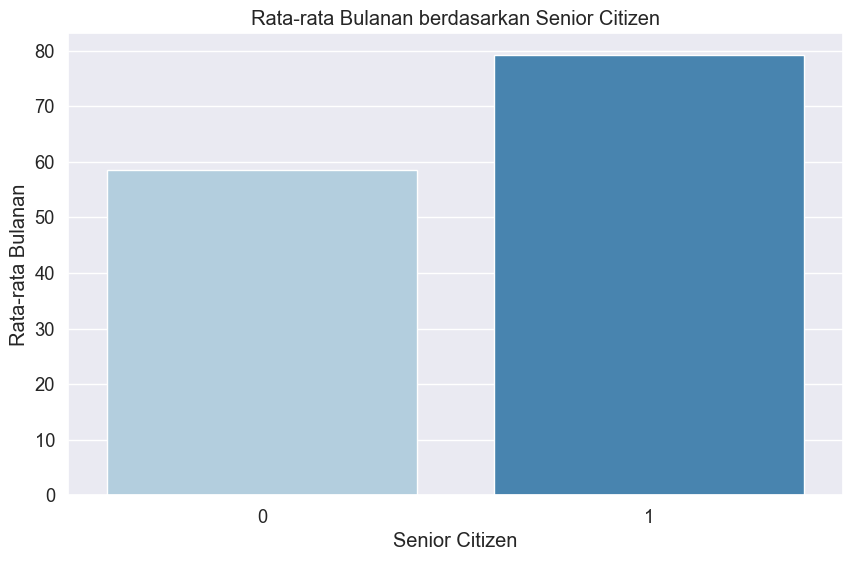

In [84]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="SeniorCitizen", y="Rata_rata_bulanan", data=pengeluaran, palette="Blues")
plt.title("Rata-rata Bulanan berdasarkan Senior Citizen")
plt.xlabel("Senior Citizen")
plt.ylabel("Rata-rata Bulanan")

# Show the plot
plt.show()


> jadi dapat diketahui bahwa rata-rata pengeluaran bulanan untuk para pelanggan adalah $58 per bulan dan $2410 per tahun
---

## 4. berapa preferensi harga yang cocok untuk layanan berdasarkan pengeluaran pelanggan? 

In [85]:
# tentukan batas harga atas dan bawah pada kolom pengeluaran bulanan dan tahunan

harga_deviasi = telko_data['MonthlyCharges'].std() #standar deviasi dari pengeluaran tiap bulan
size = len(telko_data) #jumlah semua data 

# penghitungan batas bawah dan batas atas dengan menggunakan confidence percent (95%)
low, up = stats.norm.interval(0.95,loc=telko_data['MonthlyCharges'].mean(),scale=harga_deviasi/np.sqrt(size)) 
print('Lower Limit for monthly charges:',low)
print('Upper Limit for monthly charges:',up)

Lower Limit for monthly charges: 64.0589566029286
Upper Limit for monthly charges: 65.46442831826975


batas pengeluaran per bulan untuk para pelanggan mencapai $64 perbulan dan maksimal hanya mencapai $65

In [86]:
harga_deviasi = telko_data['TotalCharges'].std() #standar deviasi dari total pengeluaran
size = len(telko_data) #jumlah semua data 

# penghitungan batas bawah dan batas atas dengan menggunakan confidence percent (95%)
low, up = stats.norm.interval(0.95,loc=telko_data['TotalCharges'].mean(),scale=harga_deviasi/np.sqrt(size)) 
print('Lower Limit for total charges:',low)
print('Upper Limit for total charges:',up)

Lower Limit for total charges: 2226.793015351771
Upper Limit for total charges: 2332.672468106982


batas total pengeluaran untuk para pelanggan mencapai $2226 perbulan dan maksimal hanya mencapai $2332

> dengan perbandingan rata-rata bulanan dan total pengeluaran dengan batas atas dan bawah dari pengeluaran bulanan dan tahunan menandakan bahwa harga yang dikeluarkan untuk berlangganan masih lebih tinggi dibandingkan dengan rata-rata pengeluaran dari pelanggan. setidaknya kita harus mengurangi harga layanan.

---
## 5. Bagaimana persebaran data dari total harga, harga per bulan, tenure

In [87]:
# central tendency for pengeluaran bulanan
product_terjual_mean = telko_data['MonthlyCharges'].mean()
print(f'rata-rata pengeluaran bulanan: {product_terjual_mean}')

product_terjual_median = telko_data['MonthlyCharges'].median()
print(f'nilai tengah pengeluaran bulanan: {product_terjual_median}')

product_terjual_modus = telko_data['MonthlyCharges'].mode()
print(f'modus pengeluaran bulanan: {product_terjual_modus}')

product_deviasi = telko_data['MonthlyCharges'].std()
print(f'standard deviasi pengeluaran bulanan: {product_deviasi:.2f}')

product_skew = telko_data['MonthlyCharges'].skew()
print(f'pengeluaran bulanan skew: {product_skew:.2f}')

product_kurtosis = telko_data['MonthlyCharges'].kurtosis()
print(f'pengeluaran bulanan kurtosis: {product_kurtosis:.2f}')

rata-rata pengeluaran bulanan: 64.76169246059918
nilai tengah pengeluaran bulanan: 70.35
modus pengeluaran bulanan: 0    20.05
Name: MonthlyCharges, dtype: float64
standard deviasi pengeluaran bulanan: 30.09
pengeluaran bulanan skew: -0.22
pengeluaran bulanan kurtosis: -1.26


data pengeluaran bulanan memiliki variasi yang cukup besar, dengan sebagian besar pelanggan memiliki pengeluaran sekitar rata-rata, tetapi juga terdapat sejumlah pelanggan dengan pengeluaran yang jauh lebih rendah. Distribusi data cenderung miring ke kiri dengan ekor yang lebih panjang di sebelah kiri pusat distribusi. Hal ini mengindikasikan adanya beberapa pelanggan dengan pengeluaran yang rendah, yang menyebabkan skewness negatif. Selain itu, kurtosis negatif menunjukkan bahwa distribusi data lebih datar dibandingkan dengan distribusi normal.

In [88]:
# central tendency for total charge
product_terjual_mean = telko_data['TotalCharges'].mean()
print(f'rata-rata total charge: {product_terjual_mean}')

product_terjual_median = telko_data['TotalCharges'].median()
print(f'nilai tengah total charge: {product_terjual_median}')

product_terjual_modus = telko_data['TotalCharges'].mode()
print(f'modus total charge: {product_terjual_modus}')

product_deviasi = telko_data['TotalCharges'].std()
print(f'standard deviasi total charge: {product_deviasi:.2f}')

product_skew = telko_data['TotalCharges'].skew()
print(f'total charge skew: {product_skew:.2f}')

product_kurtosis = telko_data['TotalCharges'].kurtosis()
print(f'total charge kurtosis: {product_kurtosis:.2f}')

rata-rata total charge: 2279.7327417293764
nilai tengah total charge: 1394.55
modus total charge: 0    -1.0
1    20.2
Name: TotalCharges, dtype: float64
standard deviasi total charge: 2266.80
total charge skew: 0.96
total charge kurtosis: -0.23


data "TotalCharges" cenderung memiliki sebaran yang besar dengan beberapa nilai yang jauh dari rata-rata, yang tercermin dalam nilai tinggi standar deviasi dan skewness positif. Sebaliknya, kurtosis yang rendah menunjukkan bahwa distribusi data kurang ekstrem. Juga, adanya dua nilai modus menunjukkan kemungkinan ada dua kelompok data yang berbeda dalam distribusi ini.

In [89]:
# central tendency for tenure
product_terjual_mean = telko_data['tenure'].mean()
print(f'rata-rata tenure: {product_terjual_mean}')

product_terjual_median = telko_data['tenure'].median()
print(f'nilai tengah tenure: {product_terjual_median}')

product_terjual_modus = telko_data['tenure'].mode()
print(f'modus tenure: {product_terjual_modus}')

product_deviasi = telko_data['tenure'].std()
print(f'standard deviasi tenure: {product_deviasi:.2f}')

product_skew = telko_data['tenure'].skew()
print(f'tenure skew: {product_skew:.2f}')

product_kurtosis = telko_data['tenure'].kurtosis()
print(f'tenure kurtosis: {product_kurtosis:.2f}')

rata-rata tenure: 32.37114865824223
nilai tengah tenure: 29.0
modus tenure: 0    1
Name: tenure, dtype: int64
standard deviasi tenure: 24.56
tenure skew: 0.24
tenure kurtosis: -1.39


data "tenure" memiliki variasi yang cukup besar, dengan sebagian besar pelanggan memiliki masa berlangganan sekitar rata-rata, yaitu 32.37 bulan. Terdapat sedikit pelanggan dengan masa berlangganan yang jauh lebih lama daripada rata-rata, yang menyebabkan skewness positif yang relatif rendah. Selain itu, kurtosis negatif menunjukkan bahwa distribusi data lebih datar dibandingkan dengan distribusi normal.

---
## 6. Apakah lama waktu berlangganan berpengaruh terhdap churn rate perusahaan?

In [90]:
condition = (telko_data["Churn"] == "Yes") & (telko_data["SeniorCitizen"] == 1)
tenure_churn = telko_data[condition].groupby(["SeniorCitizen","tenure"]).agg(count = ("tenure","count") ).reset_index().sort_values("count", ascending = False).head(10)
tenure_churn

,SeniorCitizen,tenure,count
0,1,1,74
1,1,2,30
2,1,3,20
4,1,5,15
7,1,8,15
3,1,4,13
14,1,15,12
26,1,27,11
6,1,7,11
15,1,16,11


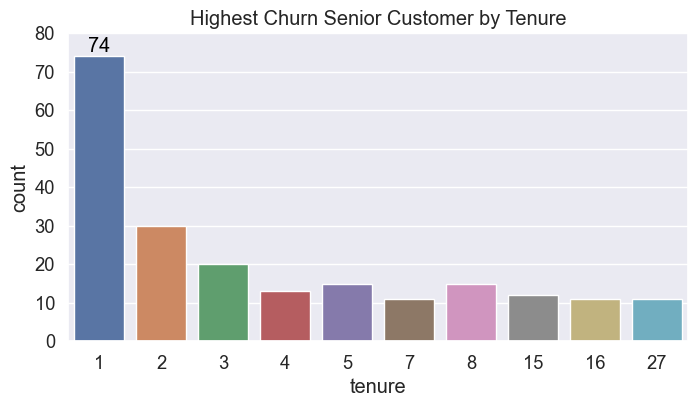

In [91]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data = tenure_churn, x = "tenure", y ="count", hue='tenure', palette="deep", legend=False)
ax.bar_label(ax.containers[0], color="Black")
ax.set_title("Highest Churn Senior Customer by Tenure")
ax.set_ylim(ymax = 80)
plt.show()

ternyata lama waktu berlangganan berpengaruh terhdap churn customer. Jumlah pelanggan senior yang beralih lebih tinggi pada tenur 1 bulan, mungkin karena biaya bulanan yang tinggi dan hanya memiliki layanan terbatas.

---

### Conclusion
 dapat disimpulkan dari penjabaran data diatas diketahui bahwa PaymentMethod, Contract, TechSupport, DeviceProtection, OnlineBackup, OnlineSecurity, InternetService, Dependents, Partner, dan SeniorCitizen cukup berpengaruh terhadap churn rate perusahaan. perlunya langkah langkah seperti membenahi pelayanan seperti online security, online backup, device protection,techsupport cukup membantu perusahaan untuk mengurangi churn rate.

 preferensi pelanggan yang menggunakan layanan adalah mereka yang bukan berasal dari kalangan non senior citizen, tidak memiliki tanggungan, dan kebanyakan memiliki pasangan. jadi dapat disimpulkan bahwa tidak ada preferensi gender untuk menggunakan layanan perusahaan. Namun dapat ditekankan bahwa kebanyakan pelanggan perusahaan merupakan orang-orang yang bukan kelas senior citizen.

 pengeluaran rata-rata per bulan untuk para pelanggan kelas non-senior citizen berada dibawah pengeluran rata-rata bulanan kelas senior citizen. sama halnya dengan rata-rata pengeluaran bulanan, rata-rata total pengeluaran untuk pelanggan kelas non-senior juga berada dibawah rata-rata pengeluaran kelas senior citizen. dapat disimpulkan bahwa salah satu alasan customer dari kelas senior melakukan churn karena tingginya pengeluaran bulanan dan total pengeluaran mereka. 
 
 dengan perbandingan rata-rata bulanan dan total pengeluaran dengan batas atas dan bawah dari pengeluaran bulanan dan tahunan menandakan bahwa harga yang dikeluarkan untuk berlangganan masih lebih tinggi dibandingkan dengan rata-rata pengeluaran dari pelanggan. setidaknya kita harus mengurangi harga layanan atau tidak mengurangi harga tetapi meningkatkan pelayanan.

 baik total pengeluaran, pengeluaran bulan, dan tenur memiliki sebaran dara yang besar. distribusi data untuk tenur lebih datar berdarkan kurtosisnya, distribusi data untuk total pengeluaran juga kurang ekstrem berdasarkan nilai kurtosisnya, ditribusi data pengeluaran bulanan cenderung miring ke kiri dengan ekor yang lebih panjang di sebelah kiri pusat distribusi dan pola distribusinya juga terbilang datar berdasarkan nilai kurtosisnya.

 dapat disimpulkan juga bahwa pelanggan paling banyak hanya bertahan selama 1 bulan saja yang menandakan bahwa para pelanggan merasa kurang puas dengan layanan yang diberikan kepada mereka. disisi lain, harga yang diberikan kepada pelanggan masih terbilang cukup tinggi. maka dari itu, saya merekomendasikan untuk memberikan potongan harga bagi calon pelanggan (hal ini diperlukan mengingat perusahaan tidak dapat memotong harga secara sembarangan) dan meningkatkan pelayanan sehingga mereka dapat terpuaskan dan mau berlangganan lebih lama
 